<a href="https://colab.research.google.com/github/ErikHartman/BMEN35/blob/main/BMEN35_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install shap
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import numpy as np
import pandas as pd

import shap
shap.initjs()

from sklearn import preprocessing

In [22]:
def get_proteins_triv_name(proteins):
    human_proteome = pd.read_csv('/content/human_proteome.gz')
    human_proteome['accession'] = human_proteome['accession'].apply(lambda x: x.split('_')[0])
    names = []
    for protein in proteins:
        if protein in human_proteome['accession'].values:
            m = human_proteome.loc[human_proteome['accession'] == protein]['trivname'].values
            assert len(m) == 1
            m = m[0].split('_')[0]
        else:
            m = protein
        names.append(m)
    return names

In [19]:
data_matrix = pd.read_csv('/content/QuantMatrix.csv')
design_matrix = pd.read_csv('/content/inner_design_matrix.tsv', sep="\t")

group_one_samples = design_matrix[design_matrix['group'] == 1]['sample'].values
group_two_samples = design_matrix[design_matrix['group'] == 2]['sample'].values


In [23]:
protein_labels = get_proteins_triv_name(data_matrix['Protein'].values)

df1 = data_matrix[group_one_samples].T
df2 = data_matrix[group_two_samples].T
df1.columns = protein_labels
df2.columns = protein_labels

y = np.array([0 for x in group_one_samples] + [1 for x in group_two_samples])
df_X = pd.concat([df1,df2]).fillna(0)
X = df_X.to_numpy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = df_X.columns
df_X_scaled

,CFAH,FIBA,KNG1,CERU,CFAI,CO1A1,CO7,IGLL5,TRFE,HPT,...,P01616,CTRB1,MFAP4,4F2,P18136,CSF1R,PSME1,TIMP2,FSTL3,RB27B
0,0.474120,-1.748935,0.568842,-0.554017,0.420675,-1.626960,0.474942,0.549018,1.353755,-0.247690,...,0.607345,-0.253816,-0.456284,-0.316671,-0.589943,1.354016,-0.191647,-0.535355,-0.124093,-0.071429
1,0.699739,2.301029,0.059307,0.377119,-0.145055,0.589385,-0.549855,-1.470286,-0.579473,0.178393,...,0.000225,-0.253816,-0.456284,-0.316671,-0.589943,-0.708802,-0.191647,-0.535355,-0.124093,-0.071429
2,0.616734,0.747695,0.528698,1.046836,0.078350,0.587803,-0.058332,-1.195053,0.025206,0.419302,...,-0.074833,-0.253816,2.139618,-0.316671,-0.589943,-0.708802,-0.191647,1.802819,-0.124093,-0.071429
3,1.606663,0.302478,1.550630,1.738238,0.690851,0.415007,0.303058,-1.215262,0.025584,0.617930,...,-0.029424,-0.253816,2.218473,-0.316671,-0.589943,1.175290,-0.191647,-0.535355,-0.124093,-0.071429
4,1.416180,1.772326,1.499721,1.163521,0.373920,0.255424,0.178799,-1.137548,-0.370086,0.508600,...,-0.042314,-0.253816,2.143739,-0.316671,-0.589943,-0.708802,-0.191647,-0.535355,-0.124093,-0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2.071304,-0.511473,1.889137,1.328322,1.312417,0.696954,-0.059947,-0.007676,2.551985,-2.530578,...,-0.431806,-0.253816,-0.456284,-0.316671,-0.589943,-0.708802,-0.191647,-0.535355,-0.124093,-0.071429
193,2.330629,-0.192622,1.889287,1.755925,0.916130,0.619886,0.359412,-0.093331,2.396032,-3.784795,...,-0.151382,-0.253816,-0.456284,-0.316671,-0.589943,-0.708802,-0.191647,-0.535355,-0.124093,-0.071429
194,2.276228,0.403057,1.167853,1.729271,0.656582,0.553426,0.930050,0.198921,2.322438,-4.093601,...,0.568234,-0.253816,-0.456284,-0.316671,-0.589943,-0.708802,5.318793,-0.535355,-0.124093,-0.071429
195,3.410748,0.418100,3.525893,1.804496,1.645494,0.177873,2.182560,0.293043,1.227210,-2.100192,...,0.405155,-0.253816,-0.456284,-0.316671,-0.589943,-0.708802,-0.191647,-0.535355,-0.124093,-0.071429


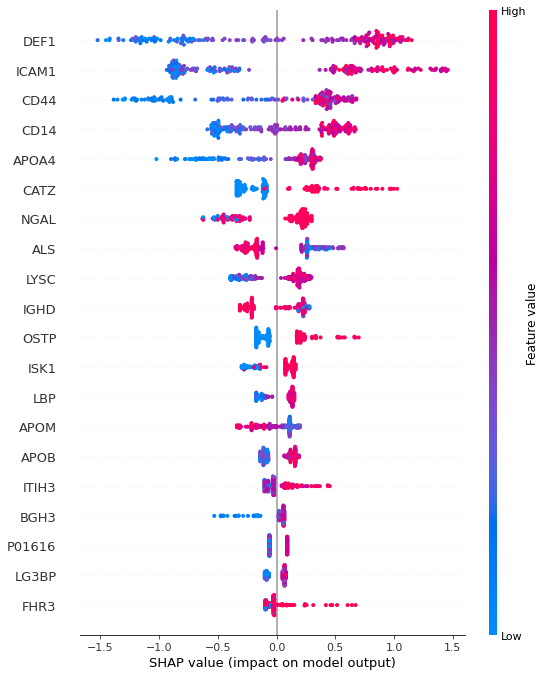

In [24]:
import xgboost

clf_xgb = xgboost.XGBClassifier(max_depth=30).fit(df_X_scaled, y)
explainer = shap.Explainer(clf_xgb)
shap_values = explainer(df_X_scaled)

shap.summary_plot(shap_values, df_X_scaled)